<a href="https://colab.research.google.com/github/mqquiroz/EasyWave_LinearSWE/blob/main/Easywave_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
!tar -xzf easywave_r34_src.tar.gz?inline=false
!rm easywave_r34_src.tar.gz\?inline\=false
%cd easywave/
!./configure
!make
!make install
%cd /usr/local/easywave/bin/
!chmod +x easywave
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd /content/
!rm -r easywave
#!git clone https://git.gfz-potsdam.de/id2/geoperil/easyWave.git
#%cd easyWave/bin/r34/
#!tar -xzf easywave_r34_src.tar.gz
#%cd easywave/
#!./configure
#!make
#!make install
#%cd /usr/local/easywave/bin/
#!chmod +x easywave
#import os
#cwd = os.getcwd()
#os.environ['PATH'] += ":"+cwd

--2025-11-26 19:55:13--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3995705 (3.8M) [application/octet-stream]
Saving to: ‘easywave_r34_src.tar.gz?inline=false’

easywave_r34_src.ta 100%[===================>]   3.81M  3.06MB/s    in 1.2s    

2025-11-26 19:55:15 (3.06 MB/s) - ‘easywave_r34_src.tar.gz?inline=false’ saved [3995705/3995705]

/content/easywave
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking for g++... g++
checking whether the C++ com

In [37]:
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/data/examples.tar.gz?inline=false
!tar -xzf examples.tar.gz?inline=false
!rm examples.tar.gz?inline=false
!wget https://raw.githubusercontent.com/mqquiroz/EasyWave_LinearSWE/main/Sumatra_2004/Sumatra2004.flt
!wget https://raw.githubusercontent.com/mqquiroz/EasyWave_LinearSWE/main/Sumatra_2004/POIs_Sumatra2004.txt

--2025-11-26 20:02:42--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/data/examples.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48632405 (46M) [application/octet-stream]
Saving to: ‘examples.tar.gz?inline=false’

examples.tar.gz?inl 100%[===================>]  46.38M  15.2MB/s    in 3.1s    

2025-11-26 20:02:47 (15.2 MB/s) - ‘examples.tar.gz?inline=false’ saved [48632405/48632405]

--2025-11-26 20:02:48--  https://raw.githubusercontent.com/mqquiroz/EasyWave_LinearSWE/main/Sumatra_2004/Sumatra2004.flt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268 [text

In [38]:
!mkdir simulacion
%cd simulacion
#!easywave -grid /content/examples/e2Asean.grd -source /content/examples/BengkuluSept2007.flt -time 120
!easywave -grid /content/examples/e2Asean.grd -source /content/Sumatra2004.flt -time 120 -poi /content/POIs_Sumatra2004.txt
!wget https://raw.githubusercontent.com/mqquiroz/EasyWave_LinearSWE/main/functions_easywave.py

/content/simulacion

easyWave ver.2013-04-11
Model time = 00:00:00,   elapsed: 1 msec
Model time = 00:10:00,   elapsed: 155 msec
Model time = 00:20:00,   elapsed: 391 msec
Model time = 00:30:00,   elapsed: 643 msec
Model time = 00:40:00,   elapsed: 1375 msec
Model time = 00:50:00,   elapsed: 1771 msec
Model time = 01:00:00,   elapsed: 2255 msec
Model time = 01:10:00,   elapsed: 2853 msec
Model time = 01:20:00,   elapsed: 3545 msec
Model time = 01:30:00,   elapsed: 4349 msec
Model time = 01:40:00,   elapsed: 6200 msec
Model time = 01:50:00,   elapsed: 8352 msec
Model time = 02:00:00,   elapsed: 9578 msec
--2025-11-26 20:03:29--  https://raw.githubusercontent.com/mqquiroz/EasyWave_LinearSWE/main/functions_easywave.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [49]:
!pip install netCDF4
from functions_easywave import ew2py
from functions_easywave import load_surfer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.interpolate
import netCDF4 as nc4
from IPython.display import HTML
from matplotlib import animation

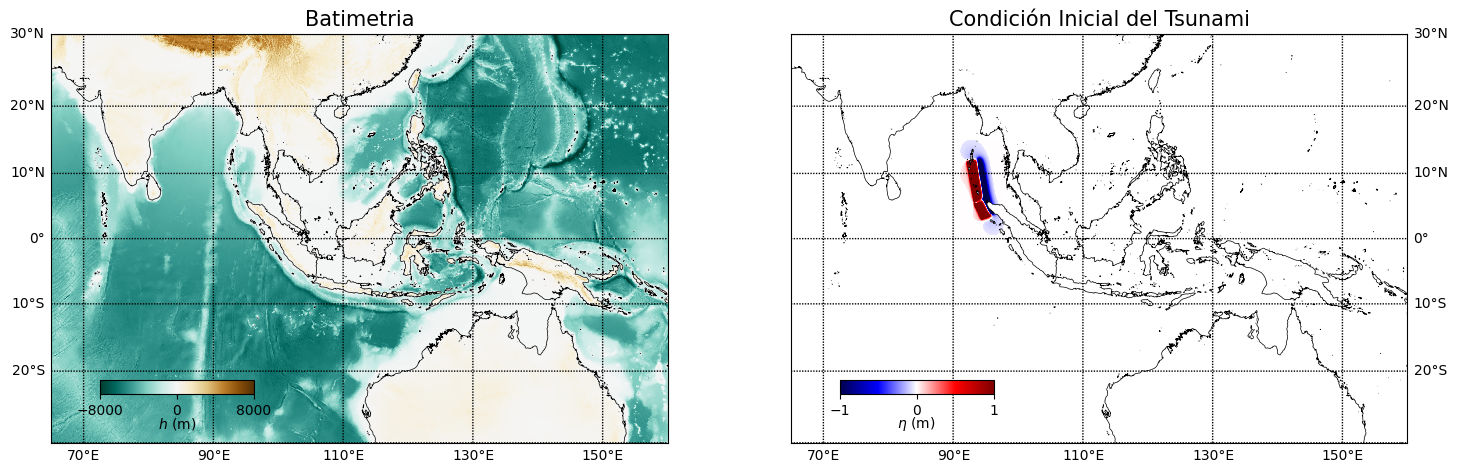

In [50]:
#Batimetria
lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/examples/e2Asean.grd')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

alto = 12.5
ancho = 17.5
fig = plt.figure(figsize=(ancho,alto))

ax = fig.add_subplot(121)
m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=20,resolution='c')
lon_xm,lat_ym = m(lon_x,lat_y)

my_cmap = plt.cm.BrBG_r
cs = m.pcolormesh(lon_xm,lat_ym,grid,cmap = my_cmap,vmin=-8000,vmax=8000)
m.contour(lon_xm,lat_ym,grid,levels=[0],colors='k',linewidths=0.5)
m.drawparallels(np.arange(-30,30+10,10),labels=[1,0,0,0])
m.drawmeridians(np.arange(70,160+20,20),labels=[0,0,0,1])
cbaxes = inset_axes(ax, width="25%", height="3.5%",borderpad=3.5, loc=3)
cbar = fig.colorbar(cs, cax=cbaxes, ticks=[-8000,0,8000], orientation='horizontal')
cbar.set_label(r'$h$ (m)',fontsize=10, ha='center', va='center')
ax.set_title('Batimetria',fontsize=15)


#Condición Inicial
fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)
lon, lat = np.meshgrid(lon, lat)


h0_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),h0.flatten() , (lon_x,lat_y),method='linear')

m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=20,resolution='c')

ax = fig.add_subplot(122)
cmap2=plt.cm.seismic

m.contour(lon_xm,lat_ym,grid,0,colors='k',linewidths=0.5)
cond_ini = m.pcolormesh(lon_xm,lat_ym,h0_interp,cmap=cmap2,vmin=-1.0,vmax=1.0)
m.drawparallels(np.arange(-30,30+10,10),labels=[0,1,0,0])
m.drawmeridians(np.arange(70,160+20,20),labels=[0,0,0,1])

cbaxes = inset_axes(ax, width="25%", height="3.5%",borderpad=3.5, loc=3)
cbar = fig.colorbar(cond_ini, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=10, ha='center', va='center')
ax.set_title('Condición Inicial del Tsunami',fontsize=15)

plt.show()

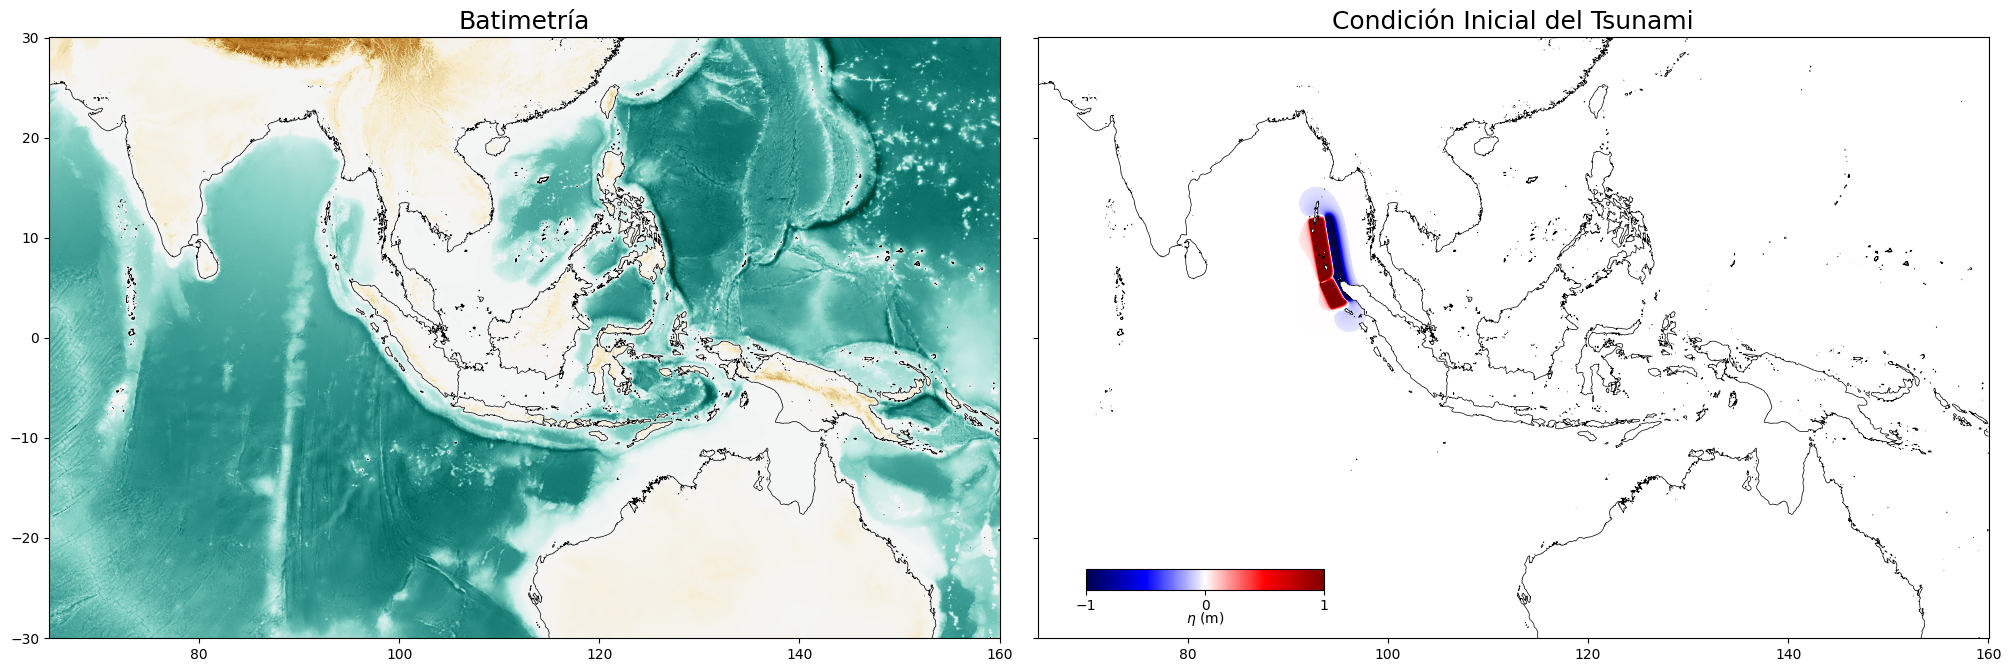

In [51]:
#Batimetria

lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/examples/e2Asean.grd')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

alto = 15
ancho = 20
fig, ax = plt.subplots(1,2,figsize=(ancho,alto),sharey=True,constrained_layout=True)

#grilla
#plt.contour(lon_x,lat_y,grid,0,colors='k')
cmap=plt.cm.BrBG_r#gist_earth
ax[0].pcolormesh(lon_x,lat_y,grid,cmap=cmap,vmin=-8000,vmax=8000)
ax[0].contour(lon_x,lat_y,grid,levels=[0],colors='k',linewidths=0.5)
ax[0].set_title('Batimetría',fontsize=18)
ax[0].set_aspect('equal')


#Condición Inicial
fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)

cmap2=plt.cm.seismic
ax[1].contour(lon_x,lat_y,grid,0,colors='k',linewidths=0.5)
cond_ini = ax[1].pcolormesh(lon,lat,h0[:-1,:-1],cmap=cmap2,vmin=-1.0,vmax=1.0)
ax[1].set_title('Condición Inicial del Tsunami',fontsize=18)


cbaxes = inset_axes(ax[1], width="25%", height="3.5%",borderpad=3.5, loc=3)
cbar = fig.colorbar(cond_ini, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=10, ha='center', va='center')


##plt.ylim(-38,-22)
##plt.xlim(-85,-68)
ax[1].set_aspect('equal')
#plt.grid()
#plt.show()

plt.show()

In [52]:
def file_netcdf(name,grid,descripcion,dt,ttotal): # name 'sample.nc', grid:'/content/examples/e2Asean.grd', descripcion: "Simulacion MQ1"
  import numpy as np
  import netCDF4 as nc4
  from scipy.interpolate import griddata
  from scipy.interpolate import RegularGridInterpolator
  lon_x, lat_y, grd, (ny,nx) =load_surfer(grid)
  lon_x=lon_x.reshape(ny,nx)
  lat_y=lat_y.reshape(ny,nx)
  grid=grd.reshape(ny,nx)
  t = np.arange(0,ttotal+dt,dt)
  pasos = int(ttotal/dt)+1

  f = nc4.Dataset(name,'w', format='NETCDF4') #'w' stands for write
  f.createDimension('lon',nx)
  f.createDimension('lat',ny)
  f.createDimension('time',pasos)

  longitude = f.createVariable('Longitude', 'f4', 'lon')
  latitude = f.createVariable('Latitude', 'f4', 'lat')
  time = f.createVariable('Time', 'i4', 'time')
  ssh = f.createVariable('SSH', 'f4', ('time', 'lat' , 'lon'))

  longitude[:] = lon_x[0,:]
  latitude[:]  = lat_y[:,0]
  time[:] = t
  lon_lat = [latitude[:],longitude[:]]
  print([longitude[:], latitude[:]])

  #Add global attributes
  f.description = descripcion
  #Add local attributes to variable instances
  longitude.units = 'degrees'
  latitude.units = 'degrees'
  time.units = 'minutes'
  ssh.units = 'meters'

  for i in range(0,pasos):
    fileName= 'eWave.2D.{0:05d}.ssh'.format(i*60*dt)
    lon, lat, h0 = ew2py(fileName)
    lon, lat = np.meshgrid(lon, lat)
    h0_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),h0.flatten() , (lon_x,lat_y),method='linear', fill_value=0.0)
    #interp = RegularGridInterpolator((lat, lon), h0,bounds_error=False, fill_value=None)
    #interp = RegularGridInterpolator((lon, lat), h0,bounds_error=False, fill_value=None)
    #data = interp(lon_lat)
    ssh[i,:,:] = h0_interp

  f.close
  return f


In [53]:
#!ls
data = file_netcdf('sim1.nc','/content/examples/e2Asean.grd','Simulacion MQ',5,120)

[masked_array(data=[ 65.     ,  65.03334,  65.06668, ..., 159.95001,
                   159.98335, 160.0167 ],
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32), masked_array(data=[-30.      , -29.966658, -29.933315, ...,  29.949993,
                    29.983335,  30.016678],
             mask=False,
       fill_value=np.float64(1e+20),
            dtype=float32)]


In [54]:
#Abrir NetCDF4
sim = nc4.Dataset('sim1.nc')
#sim.variables
eta0 = sim['SSH'][0,::]
lon_x = sim['Longitude'][:]
lat_y = sim['Latitude'][:]

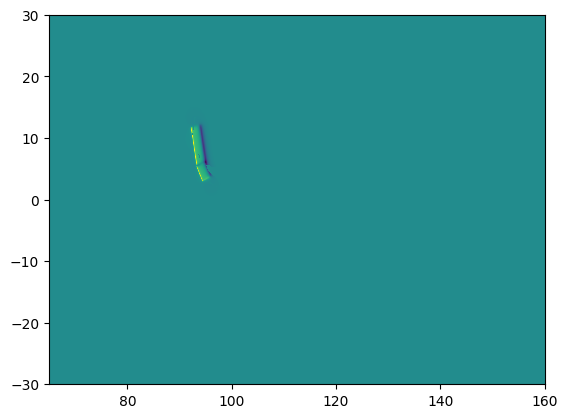

In [55]:
plt.pcolormesh(lon_x,lat_y,eta0)
plt.show()

In [ ]:
#Creamos el grafico
alto  = 5
ancho = 10

fig1, ax = plt.subplots(figsize=(ancho,alto))

dt = 5

#Definir cosas que no se mueven
ax.set_xlabel('Longitude (deg)',fontsize=15)
ax.set_ylabel('Latitude (deg)',fontsize=15)
ax.set_xlim(np.min(lon_x),np.max(lon_x))
ax.set_ylim(np.min(lat_y),np.max(lat_y))

ax.contour(lon_x,lat_y,grid,levels=[0],colors='k',linewidths=0.5)

X, Y = np.meshgrid(lon_x,lat_y)

quad = ax.pcolormesh(lon_x,lat_y,np.zeros(np.shape(X)),shading='gouraud',cmap=plt.cm.seismic, vmin=-1, vmax = 1)

#cbar = fig1.colorbar(quad)
#cbar.ax.set_ylabel('$\eta (t)$ (m)',fontsize=15)

time_text = ax.set_title('',fontsize=15)

def animate(t):
  eta = sim['SSH'][t,::]
  time_text.set_text('Tiempo = %1.0f  min' % (t*dt,))
  quad.set_array(eta.ravel())
  return quad, time_text

anim = animation.FuncAnimation(fig1, animate, frames= 25, interval=200, blit=True)
anim.save('Tsunami_Sumatra_2004.mp4', dpi=300)

HTML(anim.to_jshtml())


In [ ]:
#Creamos el grafico
alto  = 7.5
ancho = 12.5

fig, ax = plt.subplots(figsize=(ancho,alto))

#Batimetria
lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/examples/e2Asean.grd')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=20,resolution='c')
lon_xm,lat_ym = m(lon_x,lat_y)

cmap2=plt.cm.seismic
m.contour(lon_xm,lat_ym,grid,0,colors='k',linewidths=0.5)
m.drawparallels(np.arange(-30,30+10,10),labels=[0,1,0,0])
m.drawmeridians(np.arange(70,160+20,20),labels=[0,0,0,1])

quad = m.pcolormesh(lon_xm,lat_ym,np.zeros(np.shape(X)),shading='gouraud',cmap=plt.cm.seismic, vmin=-1, vmax = 1)
time_text = ax.annotate('Jul-24-2012', xy=m(130, -25),size=15,bbox=dict(boxstyle="round", fc="0.9", ec="gray",alpha=0.9),horizontalalignment='center', verticalalignment='top')#, xycoords='axes fraction')

cbaxes = inset_axes(ax, width="20%", height="3.5%",borderpad=3.5, loc=3)
cbar = fig.colorbar(quad, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=10, ha='center', va='center')
#ax.set_title('Tsunami de Sumatra 2004',fontsize=15)
dt = 5

def animate(t):
  eta = sim['SSH'][t,::]
  time_text.set_text('Tiempo = %1.0f  min' % (t*dt,))
  quad.set_array(eta.ravel())
  return quad, time_text

#cond_ini = m.pcolormesh(lon_xm,lat_ym,h0_interp,cmap=cmap2,vmin=-1.0,vmax=1.0)

anim = animation.FuncAnimation(fig, animate, frames= 25, interval=200, blit=True)

HTML(anim.to_jshtml())
